In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math,random
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
churn_data=pd.read_csv('/content/drive/MyDrive/customer_churn')

In [ ]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn_data=churn_data.drop(['customerID'],axis=1)

In [ ]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_data.shape

(7043, 20)

In [ ]:
churn_data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
churn_data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
churn_data['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
churn_data[churn_data['TotalCharges']==' ']=0

In [ ]:
churn_data['TotalCharges']=pd.to_numeric(churn_data['TotalCharges'])

In [ ]:
churn_data[churn_data['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
churn_data.reset_index()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
churn_data['TotalCharges'].values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
churn_data[churn_data.Churn=='Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [ ]:
churn_data=churn_data[churn_data['TotalCharges']!=0]

In [ ]:
churn_data.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
churn_data[churn_data.Churn=='Yes'].shape

(1869, 20)

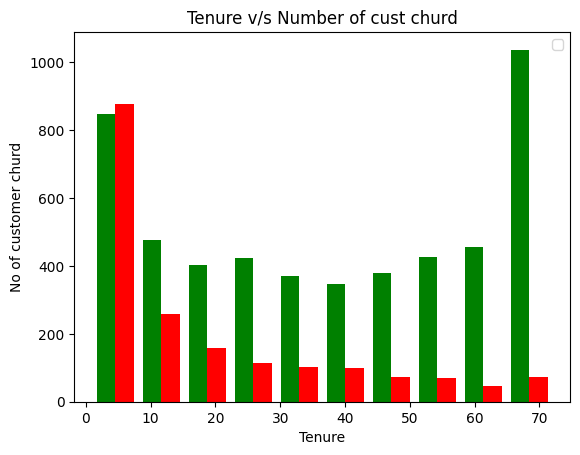

In [ ]:
t_c_no=churn_data[churn_data['Churn']=='No'].tenure
t_c_yes=churn_data[churn_data['Churn']=='Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel("No of customer churd")
plt.title("Tenure v/s Number of cust churd")

plt.hist([t_c_no,t_c_yes],color=["green","red"])
plt.legend()

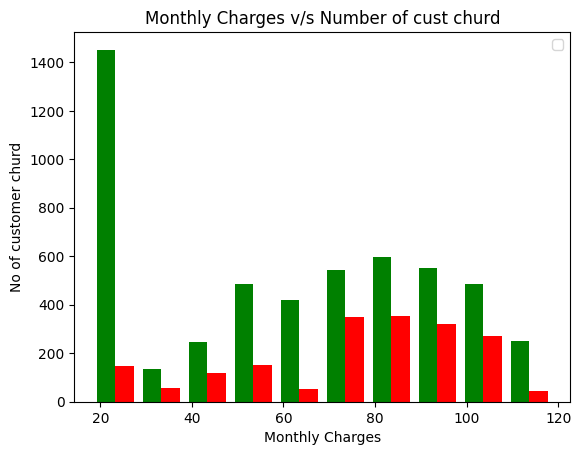

In [ ]:
m_c_no=churn_data[churn_data['Churn']=='No'].MonthlyCharges
m_c_yes=churn_data[churn_data['Churn']=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel("No of customer churd")
plt.title("Monthly Charges v/s Number of cust churd")

plt.hist([m_c_no,m_c_yes],color=["green","red"])
plt.legend()

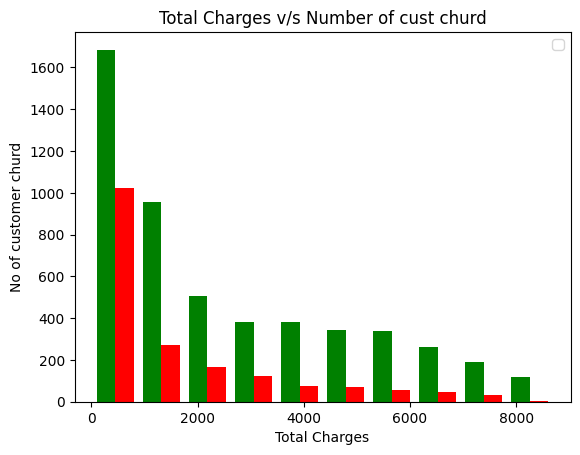

In [ ]:
total_c_no=churn_data[churn_data['Churn']=='No'].TotalCharges
total_c_yes=churn_data[churn_data['Churn']=='Yes'].TotalCharges

plt.xlabel('Total Charges')
plt.ylabel("No of customer churd")
plt.title("Total Charges v/s Number of cust churd")

plt.hist([total_c_no,total_c_yes],color=["green","red"])

plt.legend()

In [ ]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
def col_unique(d):
  for col in d:
    print(col,":",d[col].unique())

In [ ]:
col_unique(churn_data)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [ ]:
churn_data[[churn_data['MultipleLines']=='No phone service']]= 'No'

In [ ]:
churn_data.replace('No internet service',"No",inplace=True)
churn_data.replace('No phone service',"No",inplace=True)


In [ ]:
col_unique(churn_data)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [1 34 2 45 8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27 5 46
 11 70 63 43 15 60 18 66 9 3 31 50 64 56 7 42 35 48 29 65 38 68 32 55 37
 36 41 6 4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1 44.2 78.7]
TotalCharges : [29.85 1889.5 108.15 ... 346.45 306.6 6844.5]
Churn : ['No' 'Yes']


In [ ]:
yes_no_col=['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingTV','StreamingMovies','PaperlessBilling','Churn']


In [ ]:
for col in yes_no_col:
  churn_data[col].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
col_unique(churn_data)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [1 34 2 45 8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27 5 46
 11 70 63 43 15 60 18 66 9 3 31 50 64 56 7 42 35 48 29 65 38 68 32 55 37
 36 41 6 4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1 44.2 78.7]
TotalCharges : [29.85 1889.5 108.15 ... 346.45 306.6 6844.5]
Churn : [0 1]


In [ ]:
cols=['gender','InternetService','Contract','PaymentMethod']
churn_data=pd.get_dummies(data=churn_data,columns=cols)

In [ ]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler=MinMaxScaler()
churn_data[columns_to_scale] = scaler.fit_transform(churn_data[columns_to_scale])

In [ ]:
X=churn_data.drop("Churn",axis='columns')
y=churn_data['Churn']

In [ ]:
X

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.000000,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.464789,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0.014085,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.619718,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0.014085,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.323944,1,1,1,0,1,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,1,1,1.000000,1,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,0.140845,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,0.042254,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5625, 27), (1407, 27), (5625,), (1407,))

In [ ]:
S

Epoch 1/50
12/12 [==============================] - 1s 4ms/step - loss: 0.6736 - accuracy: 0.5812
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5847 - accuracy: 0.7301
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5655 - accuracy: 0.7348
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5463 - accuracy: 0.7351
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5308 - accuracy: 0.7394
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5160 - accuracy: 0.7433
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5050 - accuracy: 0.7449
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4937 - accuracy: 0.7483
Epoch 9/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4854 - accuracy: 0.7534
Epoch 10/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.7607
Epoch 11/50
12/12 [

In [ ]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(27,), activation='sigmoid',kernel_initializer=keras.initializers.GlorotNormal()),
    keras.layers.Dense(1,activation='sigmoid')
])

model2.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model
model2.fit(X_train, y_train, epochs=500, batch_size = 500)





Epoch 1/500
12/12 [==============================] - 1s 3ms/step - loss: 0.6280 - accuracy: 0.7339
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5904 - accuracy: 0.7346
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5825 - accuracy: 0.7346
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5800 - accuracy: 0.7346
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7346
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7346
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.7346
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.7346
Epoch 9/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.7346
Epoch 10/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.7346
Epoch 11/

In [ ]:
model3 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(27,), activation='sigmoid',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=None)),
    keras.layers.Dense(1,activation='sigmoid')
])

model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model
model3.fit(X_train, y_train, epochs=500, batch_size = 500)





Epoch 1/500
12/12 [==============================] - 1s 8ms/step - loss: 0.6219 - accuracy: 0.7136
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 0.5641 - accuracy: 0.7346
Epoch 3/500
12/12 [==============================] - 0s 7ms/step - loss: 0.5430 - accuracy: 0.7346
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5225 - accuracy: 0.7346
Epoch 5/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5062 - accuracy: 0.7346
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 0.4918 - accuracy: 0.7356
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4796 - accuracy: 0.7454
Epoch 8/500
12/12 [==============================] - 0s 6ms/step - loss: 0.4694 - accuracy: 0.7547
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4607 - accuracy: 0.7692
Epoch 10/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4536 - accuracy: 0.7781
Epoch 11/

In [ ]:
model4 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(27,), activation='sigmoid',kernel_initializer = tf.keras.initializers.Zeros()),
    keras.layers.Dense(1,activation='sigmoid')
])

model4.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model
model4.fit(X_train, y_train, epochs=500, batch_size = 500)




Epoch 1/500
12/12 [==============================] - 1s 3ms/step - loss: 0.6782 - accuracy: 0.5566
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.7346
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.7346
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5354 - accuracy: 0.7346
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.7346
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7346
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4930 - accuracy: 0.7349
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7399
Epoch 9/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7545
Epoch 10/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.7675
Epoch 11/

In [ ]:
model5 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(27,)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1,activation='sigmoid')
])

model5.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model
model5.fit(X_train, y_train, epochs=500, batch_size = 500)




Epoch 1/500
12/12 [==============================] - 2s 12ms/step - loss: 0.5105 - accuracy: 0.7397
Epoch 2/500
12/12 [==============================] - 0s 12ms/step - loss: 0.4387 - accuracy: 0.7884
Epoch 3/500
12/12 [==============================] - 0s 12ms/step - loss: 0.4210 - accuracy: 0.8039
Epoch 4/500
12/12 [==============================] - 0s 14ms/step - loss: 0.4193 - accuracy: 0.8020
Epoch 5/500
12/12 [==============================] - 0s 13ms/step - loss: 0.4103 - accuracy: 0.8060
Epoch 6/500
12/12 [==============================] - 0s 12ms/step - loss: 0.4060 - accuracy: 0.8087
Epoch 7/500
12/12 [==============================] - 0s 9ms/step - loss: 0.4001 - accuracy: 0.8101
Epoch 8/500
12/12 [==============================] - 0s 8ms/step - loss: 0.4075 - accuracy: 0.8064
Epoch 9/500
12/12 [==============================] - 0s 8ms/step - loss: 0.4011 - accuracy: 0.8132
Epoch 10/500
12/12 [==============================] - 0s 9ms/step - loss: 0.3961 - accuracy: 0.8078
Epo

In [ ]:
model5.evaluate(X_test,y_test)

NameError: name 'model5' is not defined

In [ ]:
y_pre=model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [ ]:
y_pre

array([[0.84574825],
       [0.0081464 ],
       [0.03969785],
       ...,
       [0.25373465],
       [0.45167094],
       [0.0566246 ]], dtype=float32)

In [ ]:
y_predict = []
for i in y_pre:
  if i > 0.5:
    y_predict.append(1)
  else:
    y_predict.append(0)
y_predict= np.array(y_predict)

In [ ]:
y_testt=np.array(y_test)

In [ ]:
y_testt

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
y_predict[200],y_testt[200]

(0, 1)

In [ ]:
print(classification_report(y_testt,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1031
           1       0.67      0.51      0.58       376

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
cm=tf.math.confusion_matrix(y_testt,y_predict)
type(cm)

tensorflow.python.framework.ops.EagerTensor

<Axes: >

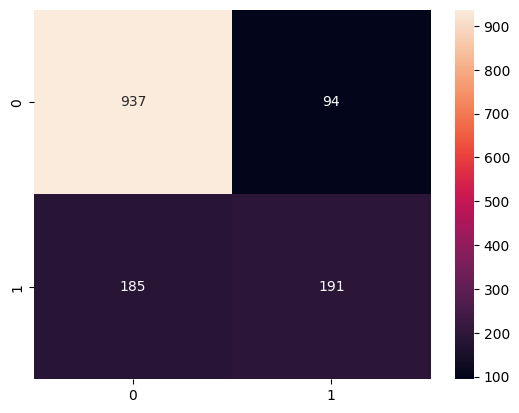

In [ ]:
sns.heatmap(cm, annot=True ,fmt='d')

In [ ]:
cm=confusion_matrix(y_testt,y_predict)
cm

array([[937,  94],
       [185, 191]])

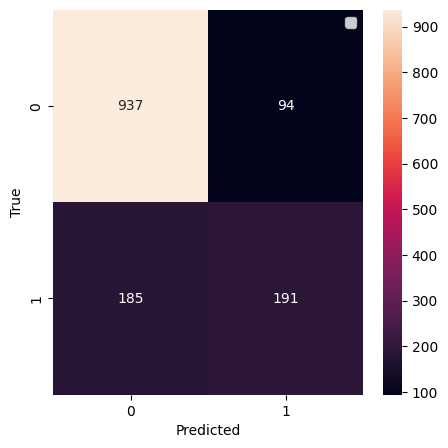

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.legend()